In [1]:
import random
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from nn import MLP
from engine import Value

In [2]:
np.random.seed(1337)
random.seed(1337)

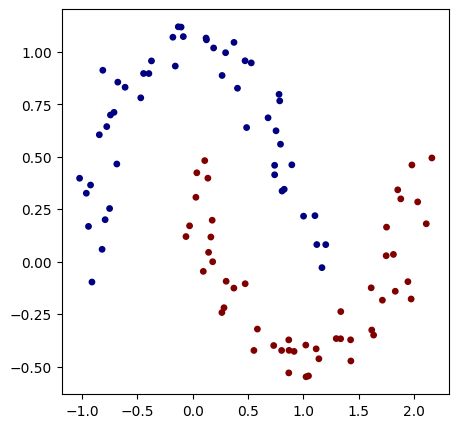

In [3]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.1)
y = y*2 - 1 # make y be -1 or 1

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=15, cmap='jet')

In [4]:
model = MLP(2, [16, 16, 1])
print(model)
print(f'Number of parameters: {len(model.parameters())}')

MLP of [Layer of [Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2), Neuron(2)], Layer of [Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16), Neuron(16)], Layer of [Neuron(16)]]
Number of parameters: 337


In [5]:
def loss():
    inputs = [list(map(Value, xrow)) for xrow in X]
    results = list(map(model, inputs))
    
    losses = [(1 + -yi*result).relu() for result, yi in zip(results, y)]
    total_loss  = sum(losses) * (1.0 / len(losses))
    accuracy = sum([(result.data > 0) == (yi > 0) for result, yi in zip(results, y)]) / len(inputs)
    
    return total_loss, accuracy

In [6]:
for i in range(100):
    total_loss, accuracy = loss()
    model.zero_grad()
    total_loss.backprop()

    learning_rate = 1.0 - 0.9*i/100
    for parameter in model.parameters():
        parameter.data -= learning_rate * parameter.grad

    print(f'Iteration : {i}, loss: {total_loss.data}, accuracy: {accuracy*100}%')
   


Iteration : 0, loss: 0.8862514464368222, accuracy: 50.0%
Iteration : 1, loss: 1.7136790633950048, accuracy: 81.0%
Iteration : 2, loss: 0.7333961267286992, accuracy: 77.0%
Iteration : 3, loss: 0.7615247055858602, accuracy: 82.0%
Iteration : 4, loss: 0.3597808333453419, accuracy: 84.0%
Iteration : 5, loss: 0.3039360355411296, accuracy: 86.0%
Iteration : 6, loss: 0.27165873405490487, accuracy: 89.0%
Iteration : 7, loss: 0.258965768030132, accuracy: 91.0%
Iteration : 8, loss: 0.24684455035335176, accuracy: 91.0%
Iteration : 9, loss: 0.26038987927745966, accuracy: 91.0%
Iteration : 10, loss: 0.2356971004730654, accuracy: 91.0%
Iteration : 11, loss: 0.2403768930229476, accuracy: 92.0%
Iteration : 12, loss: 0.20603128479123117, accuracy: 91.0%
Iteration : 13, loss: 0.220611577960292, accuracy: 93.0%
Iteration : 14, loss: 0.19010711228374738, accuracy: 92.0%
Iteration : 15, loss: 0.21687609382796402, accuracy: 93.0%
Iteration : 16, loss: 0.18642445342175257, accuracy: 92.0%
Iteration : 17, los

(-1.548639298268643, 1.951360701731357)

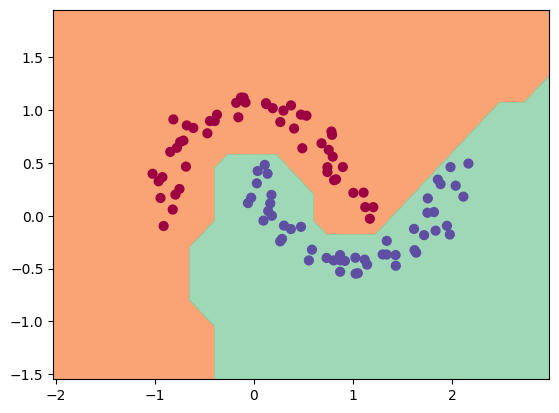

In [7]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [23]:
print(model([1, -1]))
print(model([0, 0]))
print(model([0, 1.5]))
print(model([-1, 0.5]))

Value(data=3.3667997850204783, grad=0.0))
Value(data=1.4056466333616082, grad=0.0))
Value(data=-4.361651222954868, grad=0.0))
Value(data=-2.806056580411128, grad=0.0))
